# Web Scraping

## Using Selenium and BeautifulSoup

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from seleniumbase import Driver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time
import pandas as pd
import matplotlib.pyplot as plt

### Using chromedriver

In [ ]:


url = 'https://www.rozee.pk/'
driver = Driver(uc=True)
driver.uc_open_with_reconnect(url,10)
driver.uc_gui_click_captcha()
time.sleep(3)

wait = WebDriverWait(driver, 10)
input_search = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="search"]')))
input_search.send_keys("AI developer")

button = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="search_form"]/div[4]/button')))
button.click()


In [25]:
num_pages = 2
results = []
for page in range(num_pages):
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    posting = soup.find_all('div', class_='job')
    for post in posting:
        # Extract job title
        title = post.find('h3', class_='s-18')
        title = title.find("bdi").text.strip() if title else "N/A"

        # Extract company name and location
        labels = post.find_all('a', class_='display-inline')
        comp_name = labels[0].text.strip() if len(labels) > 0 else "N/A"
        location = labels[1].text.strip().replace(",", " ") if len(labels) > 1 else "N/A"

        # Extract date posted
        date_posted = post.find('span', {"data-original-title":"Posted On"})
        date_posted = date_posted.text.strip() if date_posted else "N/A"

        # Extract skills
        skills_div = post.find('div', class_='job-dtl clearfix')
        if skills_div:
            skill_spans = skills_div.find_all('span', class_='label')
            skills = ', '.join([span.text.strip() for span in skill_spans]) if skill_spans else "N/A"
        else:
            skills = "N/A"

        results.append({
            'Job_Title': title,
            'Company Name': comp_name,
            'Location': location,
            'Date Posted': date_posted,
            'Skills': skills
        })

    # Go to next page if not last
    if page < num_pages - 1:
        try:
            next_button = driver.find_element(By.XPATH, '//*[@id="jobs"]/div[28]/div/ul/li[8]/a')
            next_button.click()
            time.sleep(3)
        except:
            break

df = pd.DataFrame(results)
df = df[(df['Job_Title'] != "N/A") & (df['Location'] != "N/A")]
df.reset_index(drop=True, inplace=True)

###  Clean and analyze the data to find most in-demand roles or skills

In [26]:
df = df.drop_duplicates()
df

,Job_Title,Company Name,Location,Date Posted,Skills
0,AI / ML Developer,"Kings Code,",Lahore,"Aug 10, 2025","API Development, Scikit-learn, Deep Learning, ..."
1,AI Developer,"DevVibe,",Pakistan,"Jul 13, 2025","TensorFlow, Chatbots, PyTorch, Huggingface, La..."
2,AI & ML Developer,"Infinitum Media PVT,",Karachi,"Jul 20, 2025","Git, NumPy, Communication Skills, Mathematical..."
3,AI & C++ Developer,"Fission Labs,",Hyderabad,"Jul 24, 2025","TensorFlow, PyTorch, English Communication, Pr..."
4,AI/ML Developer,"webotiks,",Karachi,"Jul 23, 2025","Data Scraping, Scikit-learn, Google Cloud Plat..."
5,AI Agent Developer,"Applivity Private,",Islamabad,"Aug 05, 2025","API Development, GCP, Collaboration and Commun..."
6,Generative AI Application Developer,"Stiryum,",Karachi,"Jul 22, 2025","Generative AI, AI Application Development"
7,Full Stack AI Integration Developer,"JSYS Technologies,",Lahore,"Jul 28, 2025","RESTful APIs, WebRTC, SDK, Python"
8,Senior AI & Python Developer,"Recruitzz,",Lahore,"Jul 13, 2025","Flask, Third-party API Integration, Fastapi, D..."
9,Full Stack Laravel Developer (AI-Focused),"AlgoRepublic Private,",Pakistan,"Jul 22, 2025","Database Management, Testing and Debugging, Pa..."


In [27]:
# lowercase text for job titles and skills
df['Job_Title'] = df['Job_Title'].str.lower().str.strip()

# Split the skills column into lists (So we can count each skill separately)
df['Skills_List'] = df['Skills'].apply(lambda x: [skill.strip() for skill in x.split(',')] if x != "N/A" else [])

# most in-demand job roles
role_counts = df['Job_Title'].value_counts()
print("Most in-demand job roles:")
print(role_counts.head(10))

# most in-demand skills
all_skills = [skill for skills in df['Skills_List'] for skill in skills if skill]
skill_series =pd.Series(all_skills)
skill_counts = skill_series.value_counts()
print("\nMost in-demand skills:")
print(skill_counts.head(10))

Most in-demand job roles:
Job_Title
ai engineer                            5
ai / ml developer                      1
ai developer                           1
ai & ml developer                      1
ai & c++ developer                     1
ai/ml developer                        1
ai agent developer                     1
generative ai application developer    1
full stack ai integration developer    1
senior ai & python developer           1
Name: count, dtype: int64

Most in-demand skills:
Python                                  9
LangChain                               5
TensorFlow                              5
PyTorch                                 5
Retrieval-augmented generation (RAG)    5
Machine Learning                        4
Prompt Engineering                      3
Communication Skills                    3
Scikit-learn                            3
Fastapi                                 3
Name: count, dtype: int64


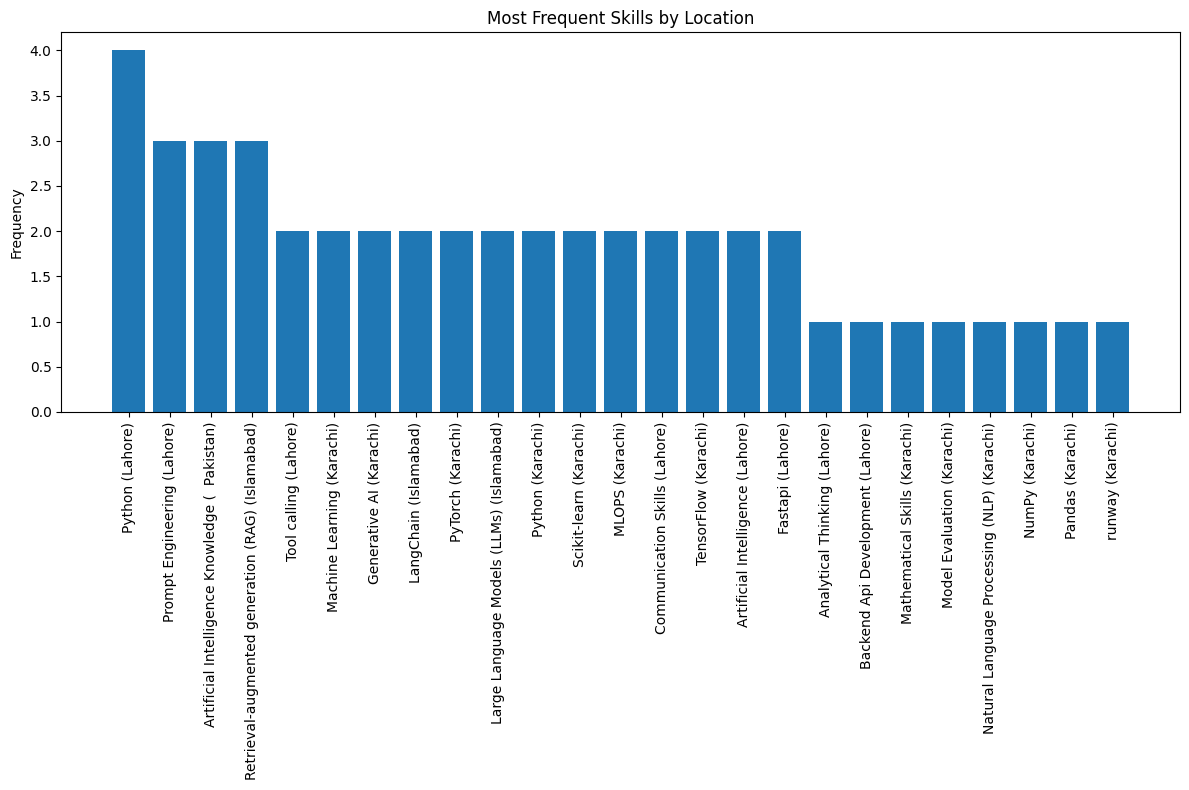

In [28]:

# converting list to row index
skill_list = df.explode('Skills_List')

# Count how many times each skill appears per city
counts = skill_list.groupby(['Location', 'Skills_List']).size().reset_index(name='Count')

# Example: Just show top 20 combinations overall
top_counts = counts.sort_values('Count', ascending=False).head(25)

plt.figure(figsize=(12, 8))
plt.bar(top_counts['Skills_List'] + " (" + top_counts['Location'] + ")", top_counts['Count'])
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.title(f"Most Frequent Skills by Location")
plt.tight_layout()
plt.show()
